In [ ]:
from PyQt5 import QtWidgets, QtGui, QtCore
from Q5_UI import Ui_MainWindow
import sys
import numpy as np
import cv2
import math
import glob
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt    
import tensorflow.keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten, Activation,Conv2D, MaxPooling2D
import datetime
# import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import TensorBoard
import os
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
model = tf.contrib.keras.models.load_model('Q5_Model.h5')
datagen = ImageDataGenerator(rescale=1.0/255.0)
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    class_mode='binary', batch_size=1, target_size=(200, 200))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Found 6302 images belonging to 2 classes.


In [ ]:
def Accuracy():
    img = cv2.imread('Training epoch.PNG')
    cv2.imshow("Training epoch", img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
def TensorBoard():
    img = cv2.imread('TensorBoard.PNG')
    cv2.imshow("TensorBoard", img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
def Random_Picture():
    number = random.randint(1,6302)
    if test_it[number][1] == 1:
        Class = "Class: dog"
    if test_it[number][1] == 0:
        Class = "Class: cat"
    pred = model.predict(test_it[number][0])
    accuracy = pred[0][int(test_it[number][1])]
    print("Accuracy:",accuracy)
    plt.title(Class)
    plt.imshow(test_it[number][0][0,:,:,:])
    plt.show()
    
def Resize():
    x=[1,2]  
    y=[0.6547,0.7885]  

    x_label=['Before Resize','After Resize']
    plt.xticks(x, x_label)  
    plt.bar(x, y) 
    plt.show()

In [ ]:
class MainWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super(MainWindow, self).__init__()
        self.ui = Ui_MainWindow()
        self.ui.setupUi(self)
        self.ui.pushButton.clicked.connect(Accuracy)
        self.ui.pushButton_3.clicked.connect(TensorBoard)
        self.ui.pushButton_2.clicked.connect(Random_Picture)
        self.ui.pushButton_4.clicked.connect(Resize)

Accuracy: 0.5286772


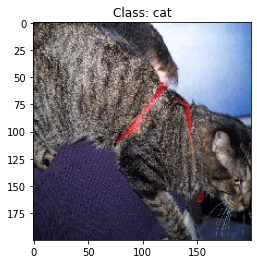

Accuracy: 0.37163523


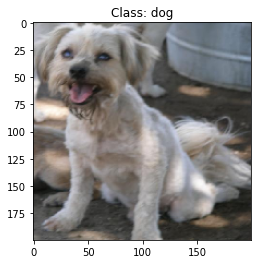

Accuracy: 0.83361816


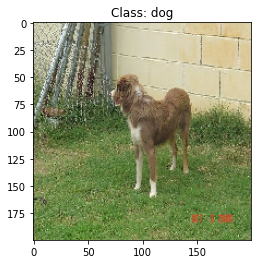

In [ ]:
if __name__ == '__main__':
    app = QtWidgets.QApplication([])
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())